In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

import axion_motion
import axion_decay
import reheating
import transport_equation
import model
from common import cosmology, constants, util
import axion_leptogenesis.model
from common.rh_neutrino import calc_Gamma_a_SU2

## Example from paper but with klein gordon

In [2]:
# choose parameter "equivalent" to the paper
T_osc = 1e13
T_dec = 1e11
T_RH = 1e15
m_a = 2 * cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_osc))
decay_rate = 0 # cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_dec))
Gamma_phi = cosmology.calc_inflaton_decay_rate_from_reheating_temperature(T_RH)
H_inf = 1e12 

In [3]:
m = model.AxionBaryogenesisModel(transport_equation.source_vector_weak_sphaleron, axion_motion.axion_rhs_simple, 
                                     axion_motion.calc_d2Vdtheta2_simple, decay_rate, (m_a,), Gamma_phi, H_inf)

In [4]:
# res = model.start(m, T_RH, (1, 0), T_end=1.672894e+11) 
%time res = model.start(m, (1, 0), model.default_solver_options, axion_motion.calc_const_axion_mass, None)

CPU times: user 774 ms, sys: 5 µs, total: 774 ms
Wall time: 791 ms


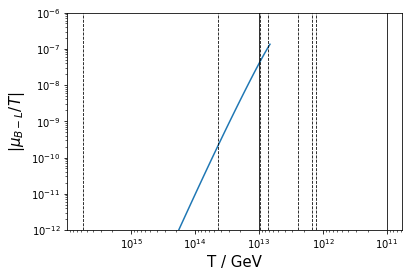

In [5]:
T = res.T_fn(res.t)
plt.loglog(T, -res.red_chem_B_minus_L)
plt.ylim(1e-12, 1e-6)
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$|\mu_{B - L} / T|$", fontsize=15)
plt.axvline(T_osc, color="black", lw=0.8)
plt.axvline(T_dec, color="black", lw=0.8)
for T in model.T_eqs: plt.axvline(T, ls="--", color="black", lw=.8)
#plt.axvline(T_end, color="red")

In [7]:
ress = model.solve_to_end(m, (1, 0), calc_axion_mass=axion_motion.calc_const_axion_mass, collect=True)

(1e-12, 1e-06)

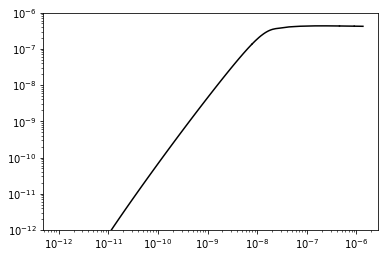

In [15]:
for res in ress:
    T = res.T_fn(res.t)
    plt.loglog(res.t, -transport_equation.calc_B_minus_L(res.red_chem_pots), color="black")
plt.ylim(1e-12, 1e-6)